In [1]:
from pyscf_custom_obj_updated import * 

<IPython.core.display.Javascript object>


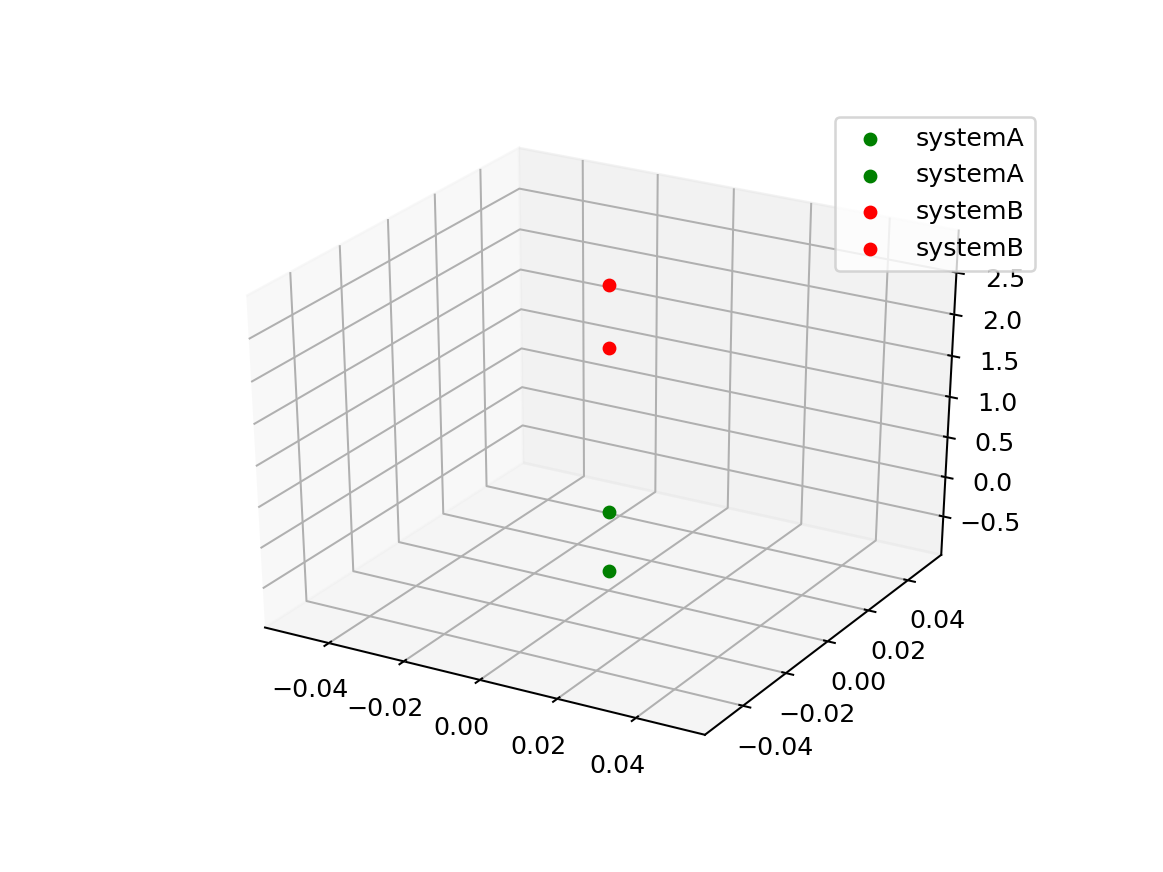

In [2]:
%matplotlib notebook

H_bond=0.74
R= 2.0 # distance of H2 --- R --- H2

Ha1=(0, 0, -H_bond)
Ha2= (0, 0, 0)

Hb1= (0,0,R)
Hb2= (0,0,R+H_bond)

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(*Ha1, marker='o', color='green', label='systemA')
ax.scatter(*Ha2, marker='o', color='green', label='systemA')
ax.scatter(*Hb1, marker='o', color='red', label='systemB')
ax.scatter(*Hb2, marker='o', color='red', label='systemB')
plt.legend()
plt.show()


In [3]:
basis = '6-31g'
# basis = "sto3g"
# basis = 'augccpvtz'

In [4]:
mol_A = gto.Mole(atom='{} {} {} {}'.format('H',*Ha1) + "; " + '{} {} {} {}'.format('H',*Ha2),
               basis=basis,
               charge=0,
               spin=0)

print(mol_A.atom)
print('')
mol_A.build()

H 0 0 -0.74; H 0 0 0



In [5]:
mol_B = gto.Mole(atom='{} {} {} {}'.format('H',*Hb1) + "; " + '{} {} {} {}'.format('H',*Hb2),
               basis=basis,
               charge=0,
               spin=0)

print(mol_B.atom)
print('')
mol_B.build()

H 0 0 2.0; H 0 0 2.74



# Full start to finish!

In [6]:
env_method_subsystem_A = 'lda,vwn'
mol_A_subsystem = subsystem(mol_A, env_method_subsystem_A)

env_method_subsystem_B = 'lda,vwn'
mol_B_subsystem = subsystem(mol_B, env_method_subsystem_B)

In [7]:
list_of_subsystems = [mol_A_subsystem, mol_B_subsystem]
full_sys_method= 'lda,vwn'
freeze_thaw_conv = 1e-5
freeze_thaw_max_iter=100

Supersystem_obj = Supersystem( list_of_subsystems, full_sys_method, freeze_thaw_conv, freeze_thaw_max_iter)
Supersystem_obj.Run_full_embedded_WF_in_DFT_calc()

******************************************************************************** 

iter:  1:   subsystem:0   |ddm|:6.562217e-01   |Tr[DP]|:2.234004e-02
iter:  1:   subsystem:1   |ddm|:1.312443e+00   |Tr[DP]|:2.234004e-02
iter:  2:   subsystem:0   |ddm|:1.561634e-01   |Tr[DP]|:1.545878e-02
iter:  2:   subsystem:1   |ddm|:3.123267e-01   |Tr[DP]|:1.545878e-02
iter:  3:   subsystem:0   |ddm|:1.051376e-01   |Tr[DP]|:1.700792e-02
iter:  3:   subsystem:1   |ddm|:2.102753e-01   |Tr[DP]|:1.700792e-02
iter:  4:   subsystem:0   |ddm|:8.023333e-02   |Tr[DP]|:1.655454e-02
iter:  4:   subsystem:1   |ddm|:1.604667e-01   |Tr[DP]|:1.655454e-02
iter:  5:   subsystem:0   |ddm|:6.287022e-02   |Tr[DP]|:1.672344e-02
iter:  5:   subsystem:1   |ddm|:1.257404e-01   |Tr[DP]|:1.672344e-02
iter:  6:   subsystem:0   |ddm|:4.959184e-02   |Tr[DP]|:1.665952e-02
iter:  6:   subsystem:1   |ddm|:9.918368e-02   |Tr[DP]|:1.665952e-02
iter:  7:   subsystem:0   |ddm|:3.918774e-02   |Tr[DP]|:1.669895e-02
iter:  7:   subsyste

Overwritten attributes  get_hcore  of <class 'pyscf.scf.hf.RHF'>


converged SCF energy = -2.25179697174107
Supersystem FCI Energy: -2.30193151
******************************************************************************** 

******************************************************************************** 

DFT Supersystem calc: -2.26648026
converged SCF energy = -1.12418238571637
-1.1492384406630278 VS 7.185264304514676
VQE-in-DFT Energy: 6.04873353
******************************************************************************** 

Error in Supersystem KS-DFT calc: -0.035451252606089945
Error in DFT-in-DFT calc: -0.06972893606997443
Error in WF-in-DFT calc: -0.01616220048873407
Error in VQE-in-DFT calc: -8.35066503925804


Trying with better functional for subsystem A

In [8]:
env_method_subsystem_A = 'b3lyp' # <-- better functional!
mol_A_subsystem = subsystem(mol_A, env_method_subsystem_A)

env_method_subsystem_B = 'lda,vwn'
mol_B_subsystem = subsystem(mol_B, env_method_subsystem_B)

In [9]:
list_of_subsystems = [mol_A_subsystem, mol_B_subsystem]
full_sys_method= 'lda,vwn'
freeze_thaw_conv = 1e-5
freeze_thaw_max_iter=50

Supersystem_obj = Supersystem( list_of_subsystems, full_sys_method, freeze_thaw_conv, freeze_thaw_max_iter)
Supersystem_obj.Run_full_embedded_WF_in_DFT_calc()

******************************************************************************** 

iter:  1:   subsystem:0   |ddm|:6.562217e-01   |Tr[DP]|:2.234004e-02
iter:  1:   subsystem:1   |ddm|:1.312443e+00   |Tr[DP]|:2.234004e-02
iter:  2:   subsystem:0   |ddm|:1.561634e-01   |Tr[DP]|:1.545878e-02
iter:  2:   subsystem:1   |ddm|:3.123267e-01   |Tr[DP]|:1.545878e-02
iter:  3:   subsystem:0   |ddm|:1.051376e-01   |Tr[DP]|:1.700792e-02
iter:  3:   subsystem:1   |ddm|:2.102753e-01   |Tr[DP]|:1.700792e-02
iter:  4:   subsystem:0   |ddm|:8.023333e-02   |Tr[DP]|:1.655454e-02
iter:  4:   subsystem:1   |ddm|:1.604667e-01   |Tr[DP]|:1.655454e-02
iter:  5:   subsystem:0   |ddm|:6.287022e-02   |Tr[DP]|:1.672344e-02
iter:  5:   subsystem:1   |ddm|:1.257404e-01   |Tr[DP]|:1.672344e-02
iter:  6:   subsystem:0   |ddm|:4.959184e-02   |Tr[DP]|:1.665952e-02
iter:  6:   subsystem:1   |ddm|:9.918368e-02   |Tr[DP]|:1.665952e-02
iter:  7:   subsystem:0   |ddm|:3.918774e-02   |Tr[DP]|:1.669895e-02
iter:  7:   subsyste

In [10]:
basis = "sto3g"
geometry = '{} {} {} {}'.format('H',*[0,0,0]) + "; " + '{} {} {} {}'.format('H',*[0,0,0.74])

mol_A_check_custom = gto.Mole(atom=geometry,
               basis=basis,
               charge=0,
               spin=0)
mol_A_check_custom.symmetry = False
print(mol_A_check_custom.atom)
print('')
mol_A_check_custom.build()

H 0 0 0; H 0 0 0.74



In [11]:
mol_A_check_custom_HF_obj = scf.RHF(mol_A_check_custom)
mol_A_check_custom_HF_obj.kernel()

H = Get_molecular_hamiltonian(mol_A_check_custom_HF_obj)

converged SCF energy = -1.11675930739643


In [12]:
from quchem.Hamiltonian_Generator_Functions import *
xyz = [('H', (0,0,0)), ('H', (0,0,0.74))]
Hamilt = Hamiltonian_PySCF('H2',
                          geometry =xyz,
                          basis=mol_A_check_custom.basis)

Hamilt.Get_Molecular_Hamiltonian()

quchem_H = Hamilt.MolecularHamiltonian

In [13]:
from openfermion.transforms import get_sparse_operator

In [14]:
sparse_H = get_sparse_operator(H)
sparse_quchem_H = get_sparse_operator(quchem_H)

In [15]:
# np.around(sparse_H.todense().real, 3)

In [16]:
# np.around(sparse_quchem_H.todense().real, 3)

In [17]:
np.abs(sparse_quchem_H.todense() - sparse_H.todense())

matrix([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0